In [72]:
#Importing libraries
import keras
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

## Loading the dataset 

In [73]:
# Our test data
train_data = pd.read_csv("DataSet\sign_mnist_train.csv") 
# Our train data
test_data = pd.read_csv("DataSet\sign_mnist_test.csv") 

In [74]:
# How owr data look likes 
train_data[0:5]

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [75]:
# Dimensions of our training data.
train_data = train_data.values
test_data = test_data.values
train_data.shape

(27455, 785)

In [76]:
# Seperating our tarining data and the targets.
x_train = train_data[:,1:]
y_train = train_data[:,0]
# Seperating our test data and the targets.
x_test = train_data[:,1:]
y_test = train_data[:,0]

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

In [77]:
y_train[0:10]

array([ 3,  6,  2,  2, 13, 16,  8, 22,  3,  3], dtype=int64)

(28, 28)


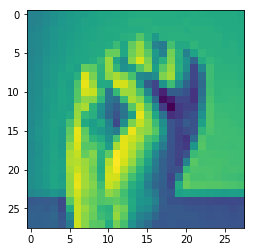

In [78]:
# Showing the handsign
img = x_train[10]
img = np.reshape(img,(28,28))
print(img.shape)
plt.imshow(img, interpolation='nearest')

In [79]:
# Our hyper parameters
batch_size = 128
num_classes = 26
epochs = 12
img_rows, img_cols = 28, 28

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [80]:
#For 3D data, "channels_last" assumes (conv_dim1, conv_dim2, conv_dim3, channels) while 
#"channels_first" assumes (channels, conv_dim1, conv_dim2, conv_dim3).
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)


In [81]:
# Our model!
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))



model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

# Testing
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])



Train on 27455 samples, validate on 27455 samples
Epoch 1/12
27455/27455 [==============================] - 98s 4ms/step - loss: 1.5720 - acc: 0.5272 - val_loss: 0.1649 - val_acc: 0.9737
Epoch 2/12
27455/27455 [==============================] - 96s 4ms/step - loss: 0.1974 - acc: 0.9403 - val_loss: 0.0122 - val_acc: 1.0000
Epoch 3/12
27455/27455 [==============================] - 97s 4ms/step - loss: 0.0674 - acc: 0.9813 - val_loss: 0.0036 - val_acc: 1.0000
Epoch 4/12
27455/27455 [==============================] - 96s 3ms/step - loss: 0.0394 - acc: 0.9883 - val_loss: 5.3935e-04 - val_acc: 1.0000
Epoch 5/12
27455/27455 [==============================] - 95s 3ms/step - loss: 0.0275 - acc: 0.9921 - val_loss: 3.4857e-04 - val_acc: 1.0000
Epoch 6/12
27455/27455 [==============================] - 98s 4ms/step - loss: 0.0197 - acc: 0.9940 - val_loss: 3.2995e-04 - val_acc: 1.0000
Epoch 7/12
27455/27455 [==============================] - 96s 4ms/step - loss: 0.0159 - acc: 0.9949 - val_loss: 1.80

In [ ]:
#Save the model
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")